<a href="https://colab.research.google.com/github/aditya-malte/Simple-LP1-Codes/blob/master/DA2(without_Sklearn_Naive_bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the Pima Dataset from kagggle:
https://www.kaggle.com/uciml/pima-indians-diabetes-database/download

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [0]:
data = pd.read_csv("diabetes.csv")

In [0]:
columns = data.columns

In [0]:
columns = [col_name for col_name in columns if not col_name=="Outcome"]

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


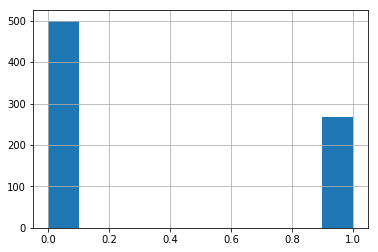

In [6]:
data["Outcome"].hist()

In [0]:
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [0]:
#scale values
scaler = MinMaxScaler()
X[columns] = scaler.fit_transform(X)

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [13]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
65,0.294118,0.497487,0.606557,0.272727,0.000000,0.432191,0.053373,0.183333
626,0.000000,0.628141,0.557377,0.000000,0.000000,0.368107,0.054654,0.000000
112,0.058824,0.447236,0.622951,0.343434,0.043735,0.464978,0.048676,0.033333
591,0.117647,0.562814,0.639344,0.505051,0.165485,0.587183,0.041418,0.050000
272,0.176471,0.613065,0.639344,0.000000,0.000000,0.342772,0.075149,0.316667


In [14]:
train_y.head()

65     0
626    0
112    0
591    0
272    0
Name: Outcome, dtype: int64

In [15]:
test_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
326,0.058824,0.613065,0.524590,0.323232,0.184397,0.523100,0.262169,0.150000
436,0.705882,0.703518,0.696721,0.333333,0.000000,0.557377,0.070880,0.333333
93,0.235294,0.673367,0.590164,0.000000,0.000000,0.354694,0.084970,0.650000
499,0.352941,0.773869,0.606557,0.323232,0.228132,0.436662,0.324936,0.300000
287,0.058824,0.597990,0.704918,0.393939,0.260047,0.679583,0.311699,0.133333


In [16]:
test_y.head()

326    1
436    0
93     1
499    0
287    1
Name: Outcome, dtype: int64

In [0]:
#generate summary
train_mean_pos = train_X[train_y==1].mean()
train_std_pos = train_X[train_y==1].std()
train_mean_neg = train_X[train_y==0].mean()
train_std_neg = train_X[train_y==0].std()

In [18]:
train_mean_pos

Pregnancies                 0.292873
Glucose                     0.719098
BloodPressure               0.579712
SkinThickness               0.217145
Insulin                     0.132657
BMI                         0.520458
DiabetesPedigreeFunction    0.202420
Age                         0.270459
dtype: float64

In [19]:
train_std_pos

Pregnancies                 0.222836
Glucose                     0.149655
BloodPressure               0.174486
SkinThickness               0.169153
Insulin                     0.176559
BMI                         0.097911
DiabetesPedigreeFunction    0.156397
Age                         0.185907
dtype: float64

In [20]:
train_mean_neg

Pregnancies                 0.189993
Glucose                     0.550338
BloodPressure               0.553349
SkinThickness               0.202920
Insulin                     0.085745
BMI                         0.451445
DiabetesPedigreeFunction    0.151501
Age                         0.154693
dtype: float64

In [21]:
train_std_neg

Pregnancies                 0.176714
Glucose                     0.125504
BloodPressure               0.153134
SkinThickness               0.150250
Insulin                     0.125629
BMI                         0.116693
DiabetesPedigreeFunction    0.129758
Age                         0.181855
dtype: float64

In [0]:
summary = { "train_mean_pos": train_mean_pos.tolist() , "train_std_pos": train_std_pos.tolist(), 
           "train_mean_neg": train_mean_neg.tolist(), "train_std_neg": train_std_neg.tolist()}

In [23]:
summary

{'train_mean_neg': [0.18999323867478068,
  0.5503378963784443,
  0.5533493499152067,
  0.2029200046441424,
  0.08574495258281027,
  0.45144491837538764,
  0.1515013202194803,
  0.1546934865900383],
 'train_mean_pos': [0.2928727046374106,
  0.7190981361835632,
  0.5797120305317027,
  0.21714499492277278,
  0.13265663502070119,
  0.520458290950094,
  0.20242048807377575,
  0.2704585537918871],
 'train_std_neg': [0.17671365966857203,
  0.12550350689940595,
  0.1531336966363326,
  0.15024965500570722,
  0.1256291908651661,
  0.11669339529480878,
  0.12975813952563878,
  0.1818545774375084],
 'train_std_pos': [0.22283649204068565,
  0.14965523787230273,
  0.17448571181611372,
  0.16915261832562617,
  0.17655949654410083,
  0.09791097352563335,
  0.15639694595626627,
  0.18590721002051983]}

In [0]:
import numpy as np
def cond_prob(x, mn, stddv):  #value , mean, standard dev| this is that fancy formula: 1/root(sigma^2)....
    varnc = stddv*stddv
    p = 1/(np.sqrt(2*np.pi*varnc)) * np.exp((-(x-mn)**2)/(2*varnc))
    return p


In [0]:
def predict(row, summary):

  #prior probability obtained as probability of class
  #i.e. we find fraction of positive samples present in the whole dataset
  prob_positive=len(summary["train_mean_pos"])/( len(summary["train_mean_pos"])+len(summary["train_mean_neg"]) )
  #then multiply it with conditional probability of each feature
  for i in range(0, len(row)):
    prob_positive = prob_positive * cond_prob(row[i],summary["train_mean_pos"][i], summary["train_std_pos"][i])
  

  #exact same process for negative
  prob_negative=len(summary["train_mean_neg"])/( len(summary["train_mean_pos"])+len(summary["train_mean_neg"]) )
  for i in range(0, len(row)):
    prob_negative = prob_negative * cond_prob(row[i],summary["train_mean_neg"][i], summary["train_std_neg"][i])
  
  return [prob_positive, prob_negative]

In [0]:
predictions_raw = []
for row in test_X.values.tolist():
  predictions_raw.append(predict(row, summary))

In [27]:
predictions_raw

[[163.90088819085588, 367.10479998948546],
 [34.00861261609767, 1.4384665104242722],
 [4.425600871890701, 5.123001830921789],
 [206.6240589772129, 25.79406214675595],
 [14.803617181102044, 9.180193310841872],
 [96.85171317838126, 99.78844590841483],
 [13.254382839923569, 563.0630883259663],
 [9.901446376581942e-08, 3.119398230048949e-05],
 [5.23761577869156, 33.98232623764374],
 [179.73156634166943, 20.097741075953333],
 [1.3214350681398426, 2.815592481697422],
 [0.0019699981520696942, 0.014621885060386764],
 [3.1179051011132577, 226.72544545030127],
 [216.20486185146143, 338.357704343169],
 [230.8345971765233, 138.49547660791038],
 [41.23515613323091, 71.06053084973038],
 [6.413946184853324, 214.8771918809747],
 [25.992364314368082, 669.574427604463],
 [46.555909936869526, 283.12976516544154],
 [0.8900352224296428, 0.31124670587155484],
 [33.7444219664347, 623.0920201796538],
 [1.0426765961262394, 3.3169114273841807],
 [0.21328488224833478, 0.07493673497418983],
 [5.530777084396035, 4

In [0]:
predictions = []
for row in predictions_raw:
  if(row[0]>row[1]):
    predictions.append(1)
  else:
    predictions.append(0)

In [29]:
confusion_matrix(test_y.tolist(), predictions)

array([[111,  41],
       [ 30,  49]])